In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
from scipy import spatial
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
train_path ='/Users/pcp25/Downloads/CityStreet_dataset/GT_density_maps/camera_view/train/Street_view1_dmap_10.h5'
test_path ='/Users/pcp25/Downloads/CityStreet_dataset/GT_density_maps/camera_view/test/Street_view1_dmap_10.h5'
train_root = '/Users/pcp25/Downloads/CityStreet_dataset/train/image/'
test_root = '/Users/pcp25/Downloads/CityStreet_dataset/test/image/'
    
f=h5py.File(train_path, 'r') 
f.keys()

with h5py.File(test_path, 'r') as h5f:
    
    h5f.keys()
    for i in range(h5f['images'].shape[0]):
            train_img_arr = h5f['images'][i, :]  # slice notation gets [i,:,:,:]
            cv2.imwrite(train_root+f'IMG_{i:03}.jpg', train_img_arr)


In [3]:
with h5py.File(test_path, 'r') as h5f:
    for i in range(h5f['images'].shape[0]):
            test_img_arr = h5f['images'][i, :]  # slice notation gets [i,:,:,:]
            cv2.imwrite(test_root+f'IMG_{i:03}.jpg', test_img_arr)

In [4]:
train_gt_root = '/Users/pcp25/Downloads/CityStreet_dataset/train/ground_truth/'
test_gt_root = '/Users/pcp25/Downloads/CityStreet_dataset/test/ground_truth/'


In [5]:
with h5py.File(train_path,'r') as h5r:
    for i in range(h5r['density_maps'].shape[0]):
        train_gt_arr = h5r['density_maps'][i,:] 
        train_gt_arr = h5r['density_maps'][i,:].reshape(380, 676)
        h5w=h5py.File(train_gt_root+f'IMG_{i:03}.h5','w')
        h5w.create_dataset('density_maps',data=train_gt_arr)
        
        h5w.close()

In [6]:
with h5py.File(test_path,'r') as h5r:
    for i in range(h5r['density_maps'].shape[0]):
        test_gt_arr = h5r['density_maps'][i,:].reshape(380, 676)
        h5w=h5py.File(test_gt_root+f'IMG_{i:03}.h5','w')
        h5w.create_dataset('density_maps',data=test_gt_arr)
        h5w.close()

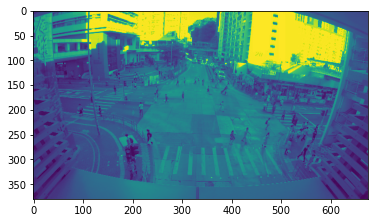

In [7]:
# now see a sample from CityStreet - original image
img_paths='/Users/pcp25/Downloads/CityStreet_dataset/test/image/IMG_000.jpg'
plt.imshow(Image.open(img_paths))

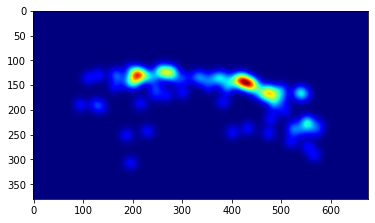

In [8]:
# from CityStreet - gt density map
gt_file = h5py.File(img_paths.replace('.jpg','.h5').replace('image','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density_maps'])
plt.imshow(groundtruth,cmap=CM.jet)

In [9]:
# ground truth count
np.sum(groundtruth)

107.99999

In [ ]:
print ('end')